Redes Neuronal Convolucional aplicadas en
MNIST reconocimiento de dígitos manuscritos

In [82]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import urllib

## Antecedentes
Para permitir el acceso a diferentes servicios solicitados por ciudadanos se requiere la consulta y certificación de estados de aseguramiento, este proceso requiere la consulta a páginas web que con el número de identificación del ciudadano expiden el certificado de aseguramiento respectivo, previa validación de un CAPTCHA específico que presenta la imagen de 5 digitos, a los que se le agrega ruido aleatorio . Para facilitar este proceso de consulta masivo y continuo se implementan procesos de RPA (Robotic Process Automation) que permiten a diferentes entidades procesar de forma automatizada el manejo de estas certificaciones. En el proceso de automatización se requiere resolver este CAPTCHA que consiste en la determinación de un número que se presenta en una imagen con las siguientes características:


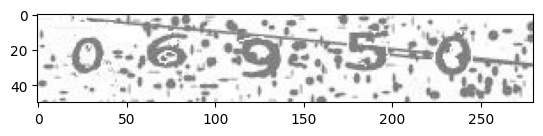

In [256]:
url = "https://drive.google.com/file/d/1HeUMC63VKq2HBAAxRS4ymnLF6NblpdEy/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgBase = cv2.imdecode(arr, -1) # 'Carga de la imagen

imgBaseInvertida = cv2.bitwise_not(imgBase)
plt.imshow(imgBase)
#plt.imshow(imgBaseInvertida)

## Solución
Se propone la construcción de un servicio de “Solución de CAPTCHA” desarrollado en Python  y que se desplegara con ZZZZ que reciba una imagen y determine el número que se presenta en esta imagen.

# Pasos:
I.	Carga de  la imagen y ejecución de procesos de filtrado general para limpiar la imagen y hacer una mejor aproximación de los ejes que definen la información dentro de la imagen con el uso de la librería OpenCV.

II.	Fraccionamiento de imagen en cada uno de los  dígitos.

III.	Entrenar una Red Neuronal Convolucional entrenada con MNIST (reconocimiento de dígitos manuscritos)  y su entrenamiento se deja a disposición de un  servicio que permitirá identificar la información que está presente en la imagen que ingresa.

IV. Prediccion



# I Carga de la imagen

1 lectura de la imagen y procesamiento previo

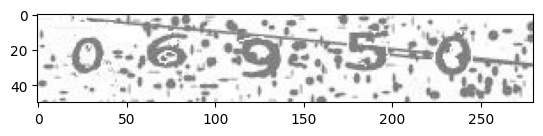

In [257]:
url = "https://drive.google.com/file/d/1HeUMC63VKq2HBAAxRS4ymnLF6NblpdEy/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
imgBase = cv2.imdecode(arr, -1) # 'Carga de la imagen
plt.imshow(imgBase)
imgTrabajo = imgBase

Inversion de la imagen

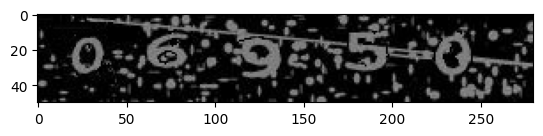

In [258]:
imgTrabajo = cv2.bitwise_not(imgTrabajo)
plt.imshow(imgTrabajo)

2 Procesmaiento previo

    Eliminacion de ruido

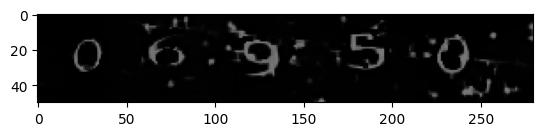

In [259]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgBase = cv2.erode(imgTrabajo, kernel)
plt.imshow(imgBase)
imgTrabajoSinRuido = cv2.fastNlMeansDenoising(imgBase, None, 12, 9, 25)
plt.imshow(imgTrabajoSinRuido)
imgTrabajo = imgTrabajoSinRuido


  3 Aplicacion de filtro para determinacion de ejes

In [260]:
#kernel = np.array(
#    [
#        [1, 1],
#        [1, 1]
#    ]
#)

##Aplicar filtro de afilado
#imgBaseFiltrado = cv2.filter2D(imgTrabajo, -1, kernel)
##blur = cv2.GaussianBlur(imgBaseFiltrado, (5,5), 0)  // no se aplica filtro Gausiano
#plt.imshow(imgBaseFiltrado)
#imgTrabajo =  imgBaseFiltrado


# II. Fraccionamiento la imagen en cada uno de los dígitos.

Determinacion de imagnes individuales
se puede explorar el uso de la funcion cv2.findContours que retorna un arreglo con las funciones encontradas o implementar YOLO (https://towardsdatascience.com/yolo-you-only-look-once-real-time-object-detection-explained-492dc9230006)
Para efecto de este ejemplo se parten la imagnes con split dao que la fuente presente uniformidad en la disposicion de los caracteres

50
280
3


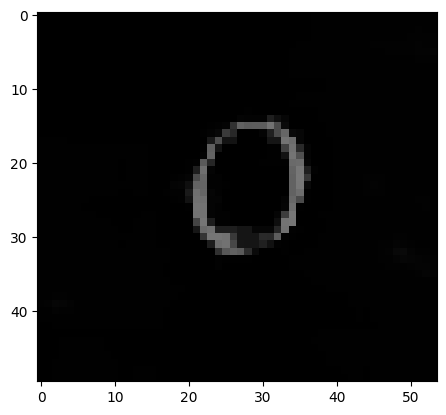

In [261]:
height, width, channels = imgTrabajo.shape
print (height)
print (width)
print (channels)
imgTrabajoTem = imgTrabajo

part_image_width = 54;
imgTrabajo01 = imgTrabajoTem[ : , :part_image_width*1]
imgTrabajo02 = imgTrabajoTem[: , part_image_width*1:part_image_width*2]
imgTrabajo03 = imgTrabajoTem[: , part_image_width*2:part_image_width*3]
imgTrabajo04 = imgTrabajoTem[: , part_image_width*3:part_image_width*4]
imgTrabajo05 = imgTrabajoTem[: , part_image_width*4:part_image_width*5]


#plt.imshow(imgTrabajo02)
#plt.imshow(imgTrabajo03)
#plt.imshow(imgTrabajo04)
#plt.imshow(imgTrabajo05)




imgTrabajo = imgTrabajo01
plt.imshow(imgTrabajo)
cv2.waitKey(0)
cv2.destroyAllWindows()

Se prepara la imagen para la prediccion trasformandola a una imagen  28 X 28 que corresponda al dataset de entrenamiento como alternativa se uso resize con interpolacion pero "engroso" la imagen y la prediccion no fue la correcta

imgTrabajo = cv2.resize(imgTrabajo, (28, 28),
interpolation = cv2.INTER_LINEAR)



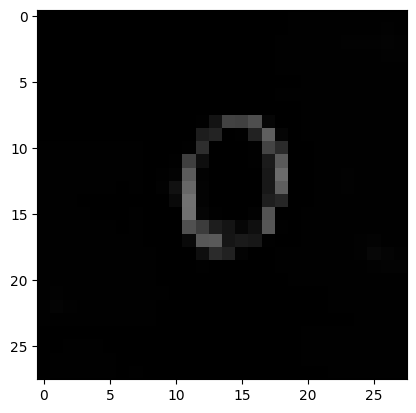

In [262]:
imgTrabajo = cv2.resize(imgTrabajo, (28, 28))
plt.imshow(imgTrabajo)

# III.	Entrena una Red Neuronal Convolucional con el conjunto de datos MNIST (reconocimiento de dígitos manuscritos)

Se puede entrenar una red con arquitectura similar usando digitos manuscritos corruptos ver

https://zenodo.org/records/3239543
https://www.kaggle.com/code/sudh4444/mnist-data-using-numpy

Cargar el conjunto de datos de entrenamiento y de prueba

In [263]:
#Cargar el conjunto de datos
mnist = keras.datasets.mnist
#Cargar divison de entrenamiento y pruebas
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Visualizar algun dato  del conjunto de entrenamiento

Label:  0
Image:
   [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 25

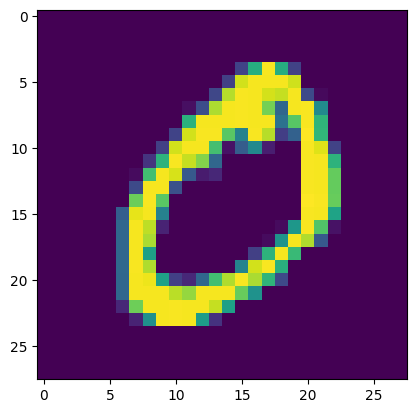

In [264]:
# Poner aqui entre 0 y 59999
index = 1
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {training_labels[index]}')
print (f'Image:\n   {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])
print (type(training_images[index]))

Visualizar algun dato  del conjunto de prueba

Label:  0
Image:
   [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 25

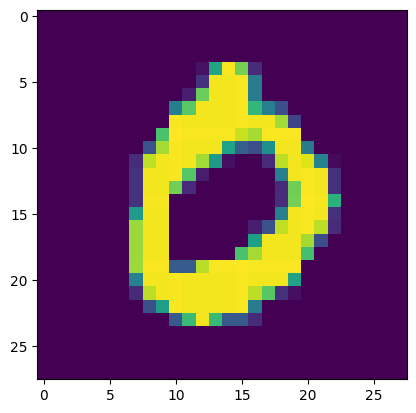

In [265]:
# Poner aqui entre 0 y 59999
index = 3
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {test_labels[index]}')
print (f'Image:\n   {test_images[index]}')
# Visualiza la imagen
plt.imshow(test_images[index])
print (type(test_images[index]))

Normalizacion de datos

In [266]:
training_images = training_images /255.0
test_images = test_images /255.0


Construccion del modelo

In [267]:
#Construccion del modelo
model = keras.models.Sequential([
 # Agregar convoluciones y max poloing
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
 # Agregar las mismas capas que antes
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Compilar el modelo

In [268]:
#Compilar el modelo
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


Entrenamiento del modelo

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9134 - loss: 0.2888
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9846 - loss: 0.0520
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9899 - loss: 0.0307
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9934 - loss: 0.0208
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9955 - loss: 0.0145
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9965 - loss: 0.0103
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9974 - loss: 0.0079
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9983 - loss: 0.0050
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9989 - loss: 0.0042
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9984 - loss: 0.0054


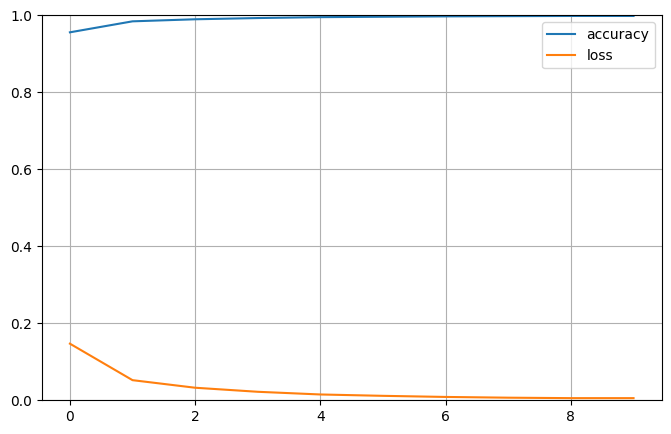

In [269]:
#Entrenar el modelo
history = model.fit(training_images, training_labels, epochs= 10)

#Graficar el historial de entrenamieto
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


Evaluacion del modelo

In [270]:
#Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)

print("Perdida del conjunto de entrenamiento",loss)
print("Precision en el conjunto de entrenamiento",accuracy)

#Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)

print("Perdida del conjunto de prueba",loss)
print("Precision en el conjunto de prueba",accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9993 - loss: 0.0019
Perdida del conjunto de entrenamiento 0.0018257707124575973
Precision en el conjunto de entrenamiento 0.9994333386421204
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9814 - loss: 0.0772
Perdida del conjunto de prueba 0.054305724799633026
Precision en el conjunto de prueba 0.9864000082015991


observa como quedaron los elementos

Label:  0
Image:
   [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0

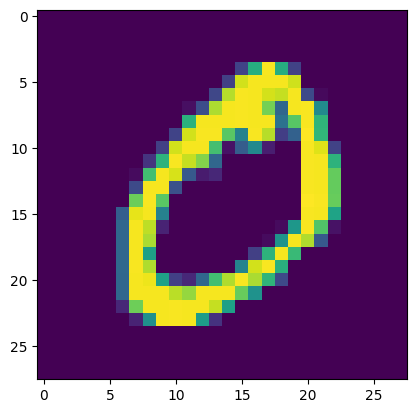

In [271]:
# Poner aqui entre 0 y 59999
index = 1
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {training_labels[index]}')
print (f'Image:\n   {training_images[index]}')
# Visualiza la imagen
plt.imshow(training_images[index])
print (type(training_images[index]))

Prediccion del modelo con datos prueba

In [272]:
#Prediccion
# Poner aqui entre 0 y 59999
index = 3
print(f'Label: {test_labels[index]}')
clasificacion = model.predict(test_images[index:index+1])
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')
print(f"This digit is probablemente a {np.argmax(clasificacion)}")
print(test_images[index:index+1].shape)
print (model.input_shape)


# Poner aqui entre 0 y 59999
#  imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print (f'Label:  {test_labels[index]}')
print (f'Image:\n   {test_images[index:index+1]}')
# Visualiza la imagen
#plt.imshow(test_images[index:index+1])
print (type(test_images[index:index+1]))


Label: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediccion: 
 [[9.9999976e-01]
 [1.0539896e-13]
 [1.7709573e-10]
 [5.7979907e-14]
 [3.0525686e-12]
 [2.9659296e-11]
 [1.9461324e-07]
 [3.2077371e-14]
 [4.2174647e-10]
 [5.8809985e-11]]
This digit is probablemente a 0
(1, 28, 28)
(None, 28, 28, 1)
Label:  0
Image:
   [[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.  

Etiquetas de 30 primeras imagenes dl conjunto de prueba

In [273]:
print(test_labels[:30] )

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


Seleccion de imagenes de interes

In [274]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 25

#Para 7
#FIRST_IMAGE = 2
#SECOND_IMAGE = 5
#THIRD_IMAGE = 14

print (test_labels[FIRST_IMAGE])
print (test_labels[SECOND_IMAGE])
print (test_labels[THIRD_IMAGE])


0
0
0


Visualizacion de Imagenes

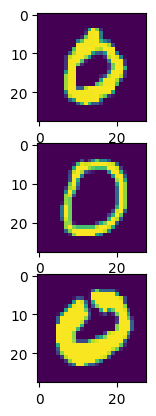

In [275]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

# IV. Prediccion
Se toma la imagen seleccionada y sepreprocesa para tenerla en la estructura np para ejecutar predicion


[[2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5, 5, 6, 6, 7], [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5, 6, 6, 7, 7], [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 4, 5, 7, 7, 8, 10, 11], [2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 5, 6, 7, 8, 10, 12], [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6], [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], [2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 4, 5, 4, 3, 4, 5, 5, 5, 5, 5, 6, 6], [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 3, 10, 31, 53, 79, 36, 8, 3, 4, 6, 6, 6, 6, 6, 6, 7], [2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 16, 37, 38, 45, 114, 148, 45, 4, 3, 5, 5, 5, 5, 6, 6, 6], [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 10, 64, 34, 7, 3, 30, 182, 165, 10, 3, 4, 4, 4, 4, 4, 4, 5], [3, 3, 3, 3, 2, 2, 2, 3, 2

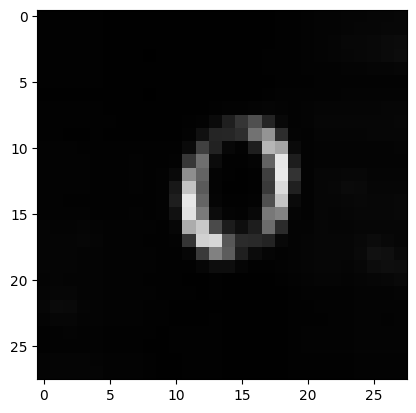

In [181]:
#Creacion de arreglo de 28 elementos en cero
imgTrabajo_base=[]
rows, cols=28,28
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(0)
    imgTrabajo_base.append(col)

#stretch_near_1_axis_final = stretch_near_1_axis
pading = 0
for i in range(0+pading, 28-pading):
  for j in range(0+pading, 28-pading):
    imgTrabajo_base[i][j] = imgTrabajo[i][j][0]

print (imgTrabajo_base)
np.set_printoptions(linewidth=320)
plt.imshow(imgTrabajo)

imgTrabajo_base_Def = [0]
imgTrabajo_base_Def[0] = imgTrabajo_base
arr = np.array(imgTrabajo_base_Def)
arr = arr/255.0    #Normalizacion


clasificacion = model.predict(arr)  # Use the reshaped array for prediction
print(f'Prediccion: \n {clasificacion.reshape(-1,1)}')

